# Cyclotron Code

The particle exits the particle accelerator at velocity 50196498.48278275 m/s after 5.028359576306673e-09 seconds


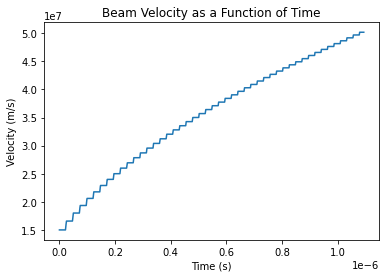

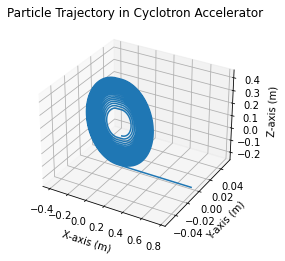

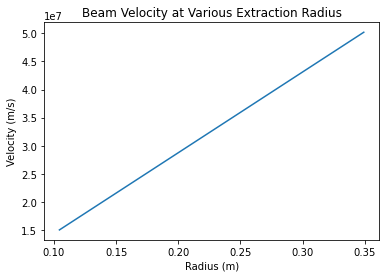

In [5]:
import numpy as np
import math as math 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from decimal import Decimal

c = 3.0E08
e = [5000000.0, 0.0, 0.0] 
b = [0.0, 0.0, -1.5]
bmag = np.linalg.norm(b)

class Particle: 
	def __init__(self, pos, vel, mass, charge): 
		self.pos = pos
		self.vel = vel
		self.mass = mass
		self.charge = charge
	
	def radius(self,b):
		b = np.linalg.norm(b)
		speed = np.linalg.norm(self.vel)
		radius = speed * self.mass / (self.charge * b)
		return radius
		
	def period(self):
		field = np.linalg.norm(b)
		period = 2.0 * math.pi * self.mass /( field * self.charge )
		return period
		



# choose a proton as the particle, describe in 3 Dimension 
proton = Particle([0.00, 0.0, 0.0], [0.05*c, 0.0, 0.0], 1.67E-27, +1.60E-19)

gap_size = .5 * proton.radius(b)


###################################################################################
#	Given position and velocity, the function returns acceleration as an array in 3D
#	The magnetic field is applied where x > 0 or  x < - gap_size
#	The electric field is applied where x < 0 and x > - gap_size
###################################################################################

jumps =0
jumps_max = 46
count = 0

def a( q_over_m, r, v ):
	global count, jumps                # if you use the global statement, the variable will become available 
	if jumps >= jumps_max:			# "outside" the scope of the function, effectively becoming a global variable
		# No acceleration
		a = 0.0
	elif r[0] >= 0 or r[0] <= -gap_size:
		a = np.cross(v, b) 
		a = a * q_over_m
		if count:
			jumps += 1
			velo[jumps] = np.linalg.norm(v)
			count = 0
	else: 	
		a = np.array(e)	
		a = a * q_over_m
		if r[1] > 0:
			a = -a
		count += 1
	return a


###############################################################################
#  
#    Solving Equations of Motions Using RK4
#
###############################################################################



# initializes array that will hold the velocity of particle 
# each time it gains velocity (crosses gap)
velo = np.zeros((jumps_max + 1,))
velo[0] = np.linalg.norm(proton.vel)


def rk4(particle, iterations, desired_value):

	RK4_pos = []
	RK4_vel = []
	
	
	
	n = 400
	h = particle.period() / n
	q_over_m = particle.charge / particle.mass
	
	p_0 = np.array(particle.pos) 
	v_0 = np.array(particle.vel) 
	
	for i in range(iterations + 10):
		i += 1
		p_i = p_0
		v_i = v_0
	
		k1 = h * a( q_over_m, p_i, v_i )
		l1 = h * v_i
		
		
		k2 = h * a( q_over_m, p_0 + (l1 * 0.5), v_0 + (k1 * 0.5) )
		l2 = h * (v_0 + (k1 * 0.5))
		

		k3 = h * a( q_over_m, p_0 + (l2 * 0.5), v_0 + (k2 * 0.5) )
		l3 = h * (v_0 + (k2 * 0.5))
	
		k4 = h * a( q_over_m, p_0 + l3, v_0 + k3 )
		l4 = h * (v_0 + k3)
		

		v_0 = v_0 + (k1 + 2.0 * (k2 + k3) + k4) / 6.0
		p_0 = p_0 + (l1 + 2.0 * (l2 + l3) + l4) / 6.0
	
		
		
		if desired_value == 'velocity': 
			vel_mag = np.linalg.norm(v_0)
			RK4_vel.append(vel_mag)
			value = RK4_vel
		elif desired_value == 'position': 
			RK4_pos.append(p_0)
			value = RK4_pos
	
		
	return value
	

#######################################################################################
#  
#    Since this program graphs many figures, it is more convenient and efficient
#		to create a plot function. 
#		This function can accomodate 2D and 3D plots, note the first argument
#		must be a 3 element list, whose entries are labels for x,y,z coordinates, respectively.
#
#########################################################################################

def plot(coord_labels, title, dimension, x, y, z = 0):
	
	fig = plt.figure()
	
	if dimension == '2d':
		ax = fig.add_subplot(1,1,1)
		ax.plot(x, y )
	elif dimension == '3d':
		ax = fig.add_subplot(111,projection = dimension)
		ax.plot3D(x, z, y)
		ax.set_zlabel(coord_labels[2])
		
	ax.set_xlabel(coord_labels[0])
	ax.set_ylabel(coord_labels[1])
	ax.set_title(title)
	
		


###############################################################################
#  
#    Plotting Trajectory of Particle
#
###############################################################################


def position_plot(particle):

	x = []
	y = []
	z = []
	
	x.append(particle.pos[0])
	y.append(particle.pos[1])
	z.append(particle.pos[2])
	
	results = rk4(proton , 10000 ,'position')	
	
	for i in results:
		x.append(i[0])
		y.append(i[1])
		z.append(i[2])
		
	coordlabel = ["X-axis (m)","Y-axis (m)","Z-axis (m)"]
	plot(coordlabel, "Particle Trajectory in Cyclotron Accelerator", '3d', x,y,z)

	

###############################################################################
#  
#    velocity	vs. time plot
#
###############################################################################


def velocity_plot(particle):
	n = 400
	h = particle.period() / n
	
	v = rk4(proton , 10000 ,'velocity')	
	t = np.linspace(0, len(v) * h, len(v))
	
	
	coordlabel = ["Time (s)","Velocity (m/s)","Z-axis (m)"]
	plot(coordlabel, "Beam Velocity as a Function of Time", '2d', t,v)
	

	#prints final velocity
	final_velo = velo[len(velo) - 1]
    #prints final time
	final_t = t[len(velo) - 1]
	print(f"The particle exits the particle accelerator at velocity {final_velo} m/s after {final_t} seconds" )


###############################################################################
#  
#    velocity vs radius
#
###############################################################################


def vel_rad_plot(particle):


	radius = np.zeros((len(velo),))

	for item in range(1, len(velo)+1):
		radius[item-1] = velo[item-1] * particle.mass / (particle.charge * bmag)
	
	coordlabel = ["Radius (m)","Velocity (m/s)","Z-axis (m)"]
	plot(coordlabel, "Beam Velocity at Various Extraction Radius", '2d', radius,velo)
	


velocity_plot(proton)
jumps = 0 
position_plot(proton)
vel_rad_plot(proton)
plt.show()
